In [1]:
import os

os.getcwd()

'/home/fidae/Desktop/fidae/mia/examples'

In [2]:
os.chdir('../src')

In [3]:
from MIAPCA import MIAPCA
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show

plt.rcParams["figure.figsize"] = (20,10)

/home/fidae/Desktop/fidae/mia/mia/lib/python3.8/site-packages/rasterio/__init__.py:277: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


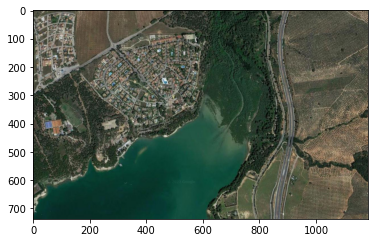

In [4]:
pca = MIAPCA('../data/Cubillas.jpg')

pca.read_image()

pca.plot_image()

In [5]:
pca.batchwise(1)

pca.extended_image.shape

(868770, 27)

In [6]:
pca.reduce(5)

Comp 0 converged in 5 iterations
Comp 1 converged in 31 iterations
Comp 2 converged in 103 iterations
Comp 3 converged in 113 iterations
Comp 4 converged in 157 iterations
[0.7607973592640831, 0.8332242400976753, 0.8858400165465262, 0.9342332293436554, 0.9556516761532542]


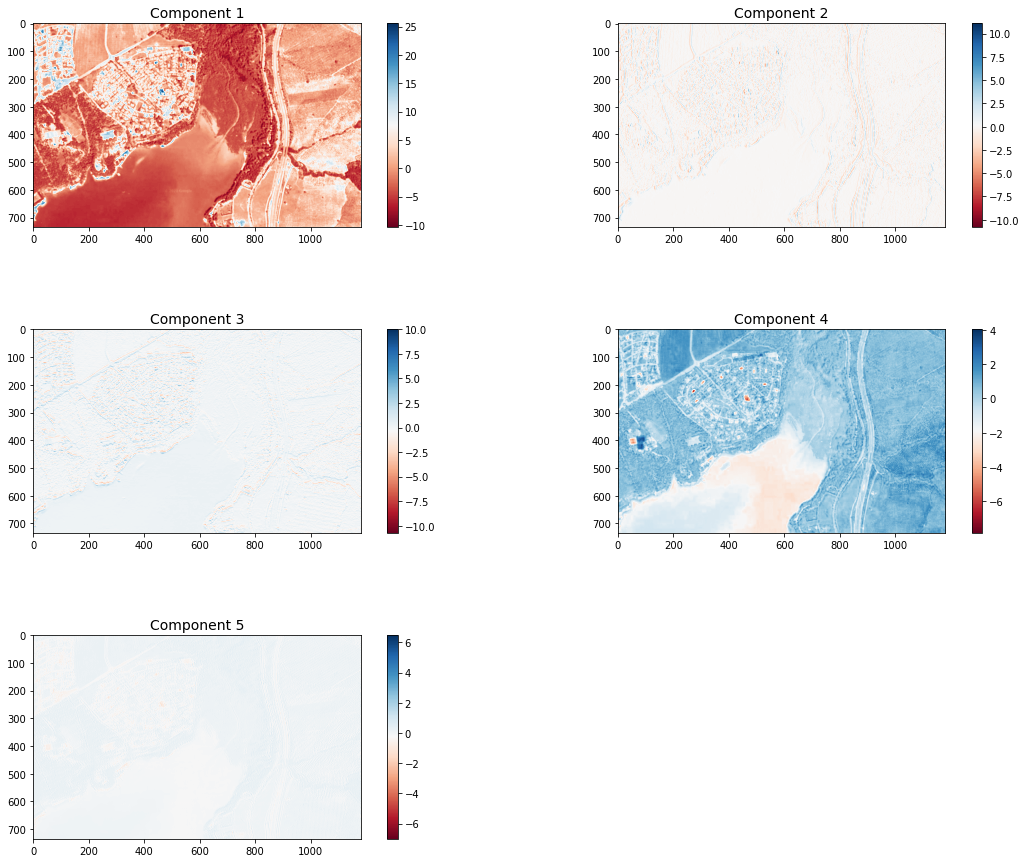

In [7]:
pca.score_map()

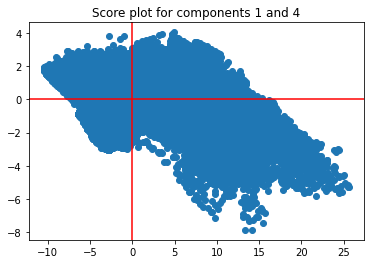

In [8]:
pca.scatter_scores(0, 3)

In [9]:
def show_results(mask):
    score_plot = np.reshape(mask, newshape=(pca.new_rows, pca.new_columns))

    fig, ax =  plt.subplots(figsize=(20, 10))

    im = ax.imshow(score_plot, cmap=plt.get_cmap('binary'))
    #show(pca.image)
    fig.colorbar(im, ax=ax)
    ax.set_title("Dummy image for the selected features")

    plt.show()

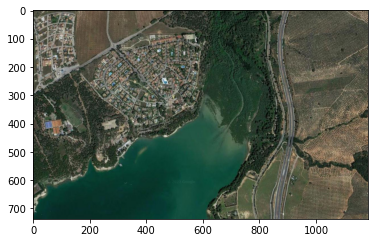

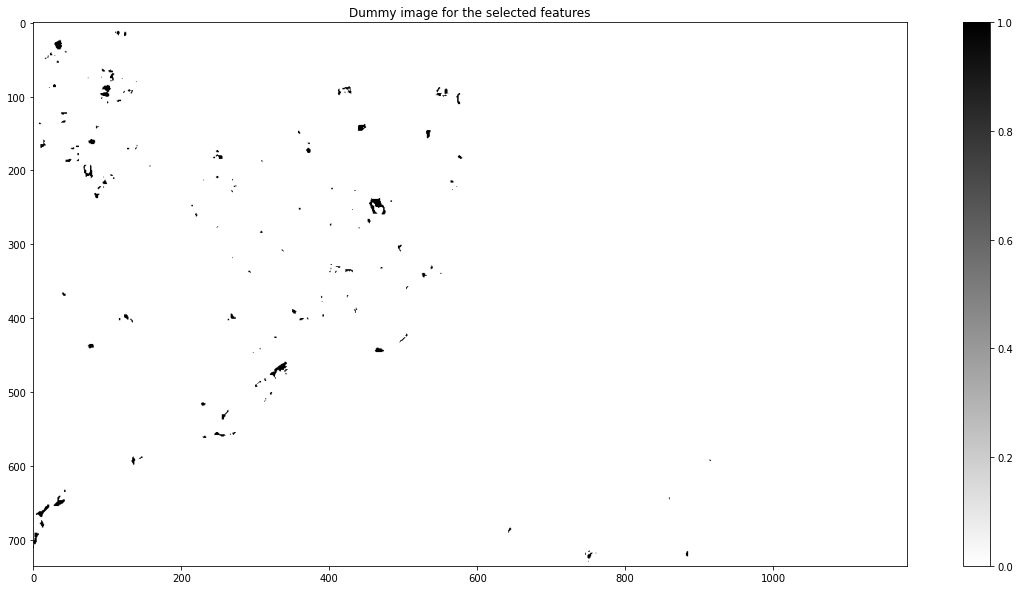

In [10]:
mask = np.where((pca.scores[:,0]>15) & (pca.scores[:,3]<0), 1, 0)

pca.plot_image()
show_results(mask)

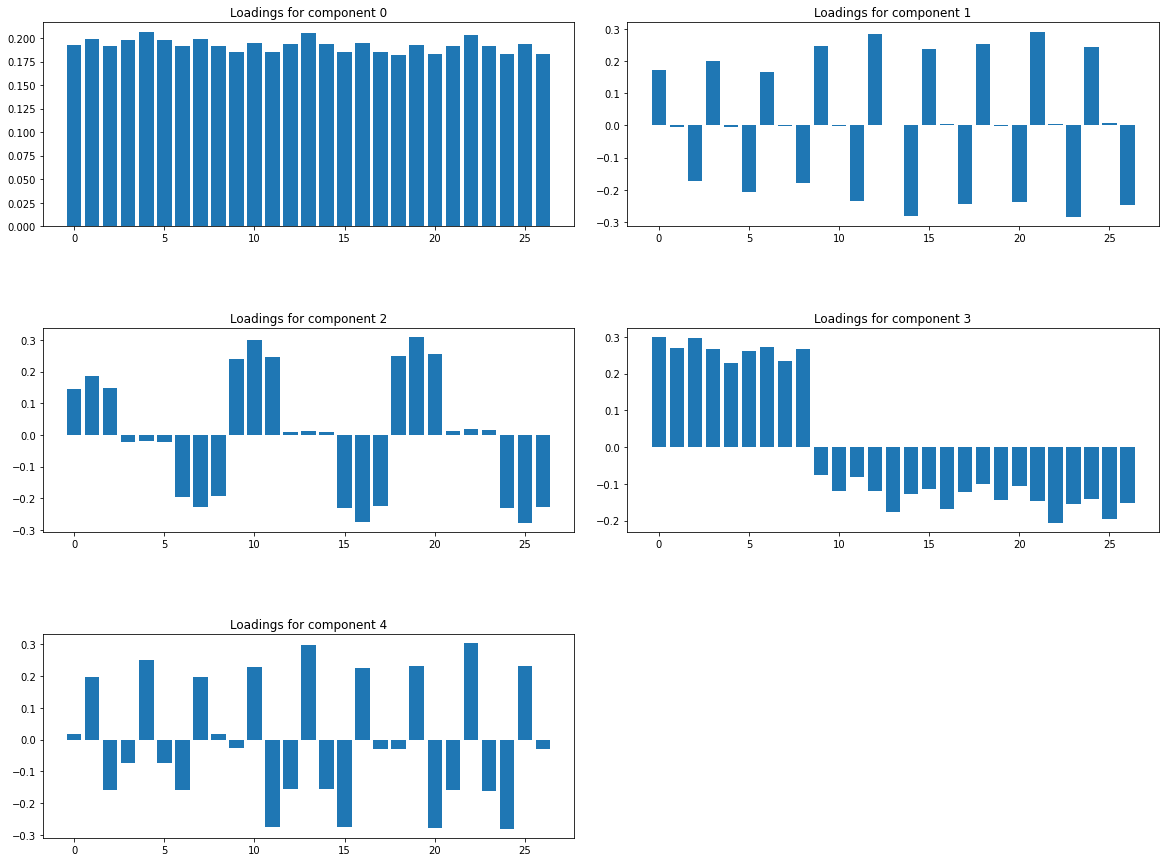

In [11]:
pca.loadings_plot()

In [44]:
pca.loadings.shape

(5, 27)